### Imports

In [2]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

Using TensorFlow backend.


In [3]:
# setting some options of pandas

pd.set_option('display.max_colwidth', 260)
pd.set_option('display.max_rows', 50)

### Loading in Dataset

In [5]:
data = pd.read_csv('../Data_json_csv/Twitter/LP_Unix_30_oct_twitter.csv')
# data = data.sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()


(658, 10)


,Sr,user,timestamp,likes,replies,retweets,Label (-2 to 2),text,UnixTime,step1
0,1,cryptoquotation,30-10-18 23:57,109,1,30,0,#bitcoin pic.twitter.com/gvUOtofTwH,1540943820,bitcoin pic twitter com gvUOtofTwH
1,3,BlockchainPC,30-10-18 23:56,4,1,1,0,Goldman Sachs One Step Closer Trading Bitcoin\r\r\r\n\r\r\r\nhttp://ccn.com/goldman-sachs-is-signing-up-customers-for-its-bitcoin-trading-product-report/Â â¦\r\r\r\n\r\r\r\n#bitcoin #btc #btcturk #cryptocurrency #Crypto #Ethereum #eth #alts #ALTSEASON #bl...,1540943760,Goldman Sachs One Step Closer Trading Bitcoin sachs is signing up customers for its bitcoin trading product report bitcoin btc btcturk cryptocurrency Crypto Ethereum eth alts ALTSEASON blockchain fintech WealthManagement twitter com Q...
2,5,pjf,30-10-18 23:54,29,3,15,0,Sources:\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n- Bitcoin energy consumption and comparisons: https://digiconomist.net/bitcoin-energy-consumptionÂ â¦\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n- New Zealand energy consumption: https://ycharts.com/indicators/new_zealand_elect...,1540943640,Sources Bitcoin energy consumption comparisons energy consumption New Zealand energy consumption zealand electricity generation There s countries world many countries are there in the world bitcoin country would ra...
3,8,pjf,30-10-18 23:52,512,15,439,-1,"At the end of January, bitcoin mining consumed electricity at the rate of 46TWh/yr, more than the ENTIRE country of New Zealand.\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\nIt's now 73TWh/yr; on par with the whole of Austria.\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n80% of the w...",1540943520,At end January bitcoin mining consumed electricity rate TWh yr ENTIRE country New Zealand It s TWh yr par whole Austria world s countries use less electricity bitcoin
4,9,crypto_iwad,30-10-18 23:52,24,3,7,1,You must have heard the debate about whether Bitcoin is suitable for coffee money or something else. Come to #scalingblockchain at SF on Nov 12 to see Crypto payments working for paying for coffee. Tickets - http://scalingblockchain.usÂ Thanks @SecryptoL...,1540943520,You must heard debate whether Bitcoin suitable coffee money something else Come scalingblockchain SF Nov see Crypto payments working paying coffee Tickets Thanks Nathan


Removing all columns except the airline_sentiment and text column.

In [6]:
data = data[['Label (-2 to 2)', 'step1']]
data.head(50)

,Label (-2 to 2),step1
0,0,bitcoin pic twitter com gvUOtofTwH
1,0,Goldman Sachs One Step Closer Trading Bitcoin sachs is signing up customers for its bitcoin trading product report bitcoin btc btcturk cryptocurrency Crypto Ethereum eth alts ALTSEASON blockchain fintech WealthManagement twitter com Q...
2,0,Sources Bitcoin energy consumption comparisons energy consumption New Zealand energy consumption zealand electricity generation There s countries world many countries are there in the world bitcoin country would ra...
3,-1,At end January bitcoin mining consumed electricity rate TWh yr ENTIRE country New Zealand It s TWh yr par whole Austria world s countries use less electricity bitcoin
4,1,You must heard debate whether Bitcoin suitable coffee money something else Come scalingblockchain SF Nov see Crypto payments working paying coffee Tickets Thanks Nathan
5,0,bcoin killing right now Love see goes I pitched similar idea client helps miners move similar POW chains back Harder relevant bitcoin chain think lot use smaller specialized networks
6,0,BTC years ago BTC started Just little perspective Utility none Adoption none
7,0,What account tho Some guy bought PayPal BTC refunded PayPa right I sent account pic twitter com NwqjledB
8,-1,Twitter Sentiment btc falling lower again Expecting bounce waiting setup trade Always hunting highest R R trades btc since volatility low pic twitter com u QdiaHnJj
9,0,I see descending triangle btc changemymind would like buy next support areapic twitter com DvBWg inGW


In [7]:
# getting only labelled data
# data = data.head(213) 
data.shape

(658, 2)

### Data exploration

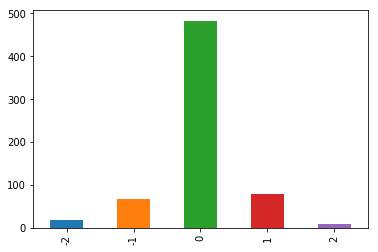

In [6]:
data['Label (-2 to 2)'].value_counts().sort_index().plot.bar()

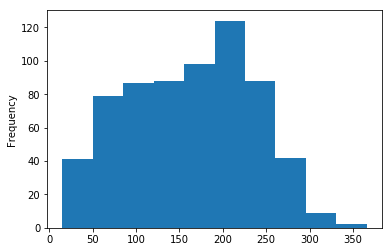

In [7]:
data['step1'].str.len().plot.hist()

In [8]:
data.shape

(658, 2)

### Preprocessing

In [9]:
data.isnull().sum()

Label (-2 to 2)    0
step1              0
dtype: int64

In [10]:
data.dropna(subset=['Label (-2 to 2)'], inplace=True)
data.isnull().sum()

Label (-2 to 2)    0
step1              0
dtype: int64

data['text'] = data['text'].str.replace('@VirginAmerica', '')
data.head()

In [9]:
data['step1'].apply(lambda x: x.lower()) #transform text to lowercase
data['step1'] = data['step1'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
data['step1'].head()

0                                                                                                                                                                                                                                     bitcoin pic twitter com gvUOtofTwH
1    Goldman Sachs One Step Closer Trading Bitcoin   sachs is signing up customers for its bitcoin trading product report        bitcoin  btc  btcturk  cryptocurrency  Crypto  Ethereum  eth  alts  ALTSEASON  blockchain  fintech  WealthManagement   twitter com Q...
2    Sources    Bitcoin energy consumption comparisons    energy consumption        New Zealand energy consumption    zealand electricity generation        There s     countries world     many countries are there in the world           bitcoin country  would ra...
3                                                                                   At end January  bitcoin mining consumed electricity rate   TWh yr  ENTIRE country New Zealand  It s   TWh yr  par whole A

Tokenizer from keras - 
maximum no. of rows = 5000
pad sequence = sentences of same length


In [10]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['step1'].values)

X = tokenizer.texts_to_sequences(data['step1'].values)
X = pad_sequences(X, maxlen = 200) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [13]:
print(X.shape)

(658, 200)


### Creating model

squential model is simplest 
model.add adds new layers to network
Dropout is used for regularization(decreasing overfitting)
256 - no. of units in each layer
Dense connection - every neuron of 1 layer connected to every other neuron of next layer

In [12]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))

compiling - takes sets 2 things 
For adam it is 0.001, reach up to 85% accuracy in 5 epochs
1. optimizer - learning rate
2. loss function - log function

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 256)          1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 256)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 256)          525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 2,331,909
Trainable params: 2,331,909
Non-trainable params: 0
_________________________________________________________________


In [15]:
y = pd.get_dummies(data['Label (-2 to 2)']).values
# print(y)
# print(data['Label (-2 to 2)'])
[print(data['Label (-2 to 2)'][i], y[i]) for i in range(0,70)]

0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
-1 [0 1 0 0 0]
1 [0 0 0 1 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
-1 [0 1 0 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
1 [0 0 0 1 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
1 [0 0 0 1 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
1 [0 0 0 1 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
-1 [0 1 0 0 0]
-1 [0 1 0 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
-1 [0 1 0 0 0]
0 [0 0 1 0 0]
-1 [0 1 0 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
-1 [0 1 0 0 0]
1 [0 0 0 1 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
1 [0 0 0 1 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
1 [0 0 0 1 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
-1 [0 1 0 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
-1 [0 1 0 0 0]
-2 [1 0 0 0 0]
0 [0 0 1 0 0]
0 [0 0 1 0 0]
-1 [0 1 0 0 0]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

training - 70%
testing - 30%

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
print(X.shape)
print(y.shape)

(658, 200)
(658, 5)


### Training model

Can include
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [18]:
batch_size = 32
epochs = 6

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/6
 - 55s - loss: 1.2093 - acc: 0.6848
Epoch 2/6
 - 50s - loss: 0.9381 - acc: 0.7217
Epoch 3/6
 - 53s - loss: 0.8669 - acc: 0.7217
Epoch 4/6
 - 54s - loss: 0.7105 - acc: 0.7500
Epoch 5/6
 - 54s - loss: 0.4629 - acc: 0.8261
Epoch 6/6
 - 55s - loss: 0.3467 - acc: 0.8652


In [19]:
model.save('sentiment_analysis.h5')

Saving modelling using Pickle

In [20]:
with open('model_twitter_200', 'wb') as f: 
    pickle.dump(model, f)

In [22]:
with open('model_twitter', 'rb') as f:
    mp = pickle.load(f)

### Testing model

In [23]:
predictions = mp.predict(X_test) 

[print(data['step1'][i], predictions[i], y_test[i]) for i in range(0, 5)]

 bitcoin pic twitter com gvUOtofTwH [2.6496765e-04 4.5406699e-04 9.9788684e-01 1.1456272e-03 2.4848001e-04] [0 0 1 0 0]
Goldman Sachs One Step Closer Trading Bitcoin   sachs is signing up customers for its bitcoin trading product report        bitcoin  btc  btcturk  cryptocurrency  Crypto  Ethereum  eth  alts  ALTSEASON  blockchain  fintech  WealthManagement   twitter com QFbLQzs  t [0.02805512 0.14185071 0.5836053  0.22897391 0.01751502] [0 0 1 0 0]
Sources    Bitcoin energy consumption comparisons    energy consumption        New Zealand energy consumption    zealand electricity generation        There s     countries world     many countries are there in the world           bitcoin country  would rank   th  Digiconomist   [0.03833545 0.18381855 0.49059138 0.26506656 0.02218812] [0 0 1 0 0]
At end January  bitcoin mining consumed electricity rate   TWh yr  ENTIRE country New Zealand  It s   TWh yr  par whole Austria      world s countries use less electricity bitcoin  [1.4893223e-04 

[None, None, None, None, None]

In [24]:
vpos_count, pos_count, neu_count, neg_count, vneg_count = 0, 0, 0, 0, 0 
real_vpos, real_pos, real_neu, real_neg, real_vneg = 0, 0, 0, 0, 0
for i, prediction in enumerate(predictions):
    
    if np.argmax(prediction) == 0:
        vpos_count += 1
    elif np.argmax(prediction) == 1:
        pos_count += 1
    elif np.argmax(prediction) == 2:
        neu_count += 1
    elif np.argmax(prediction) == 3:
        neg_count += 1
    else:
        vneg_count += 1
        
        
    
    if np.argmax(y_test[i]) == 0:
        real_vpos += 1
    elif np.argmax(y_test[i]) == 1:    
        real_pos += 1
    elif np.argmax(y_test[i]) == 2:    
        real_neu += 1
    elif np.argmax(y_test[i]) == 3:    
        real_neg += 1
    else:
        real_vneg +=1

print('Very_Positive predictions:', vpos_count)
print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Very_Negative predictions:', vneg_count)

print()
print('Real very_positive:', real_vpos)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)
print('Real very_negative:', real_vneg)

Very_Positive predictions: 0
Positive predictions: 17
Neutral predictions: 169
Negative predictions: 12
Very_Negative predictions: 0

Real very_positive: 2
Real positive: 15
Real neutral: 151
Real negative: 27
Real very_negative: 3


Total wrong predictions

In [25]:
sum = abs(vpos_count - real_vpos)
sum += abs(pos_count - real_pos)
sum += abs(neu_count - real_neu)
sum += abs(neg_count - real_neg)
sum += abs(vneg_count - real_vneg)
print(sum)

40


Total Error

In [26]:
print(sum/len(X_test)*100)

20.2020202020202
